In [1]:
import matplotlib.pyplot as plt
from os import path
import numpy as np
import cv2 as cv
import os

# Our local modules
import src.calibrate as clb
import src.util as util

# Check that we're in the correct folder

For the code in this notebook to work correctly, the Jupyter server must be started from the `endoscope-calibration` folder. Then you put all of your data in the `./endoscope-calibration/data/`. 

In [2]:
# Check that we're in the right directory
base_dir_name = 'endoscope-calibration'
cwd = os.getcwd()
if not cwd.endswith(base_dir_name):
    print('[WARNING] Your base directory is not \'{}\' - are you running '
          'Jupyter in the correct server?'.format(base_dir_name))
    
data_dir = path.join(cwd, 'data')

# Load the calibration image and mark relevant points

In [3]:
image_name = 'image-2.png'


# Positions of the markers in the image listed clockwise,
# starting from the blue marker at top left and finishing
# wit the green marker in bottom left
img_points_cart_raw = np.array([
    [163, 527, 1147, 977, 570, 384],
    [267, 167, 310, 736, 789, 786],
])

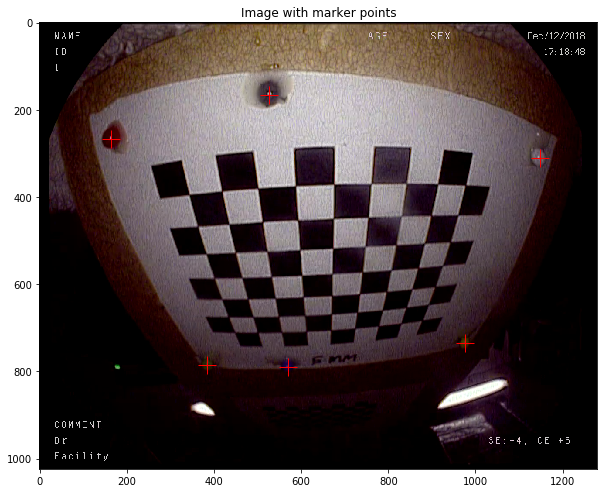

In [4]:
raw_image = cv.imread(path.join(data_dir, image_name))
raw_image = cv.cvtColor(raw_image, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))
ax.set_title('Image with marker points')
ax.imshow(raw_image)

for i in range(img_points_cart_raw.shape[1]):
    point = img_points_cart_raw[:, i]
    ax.plot(point[0], point[1], 'r+', markersize=18)

# Load camera intrinsics and undistort the image

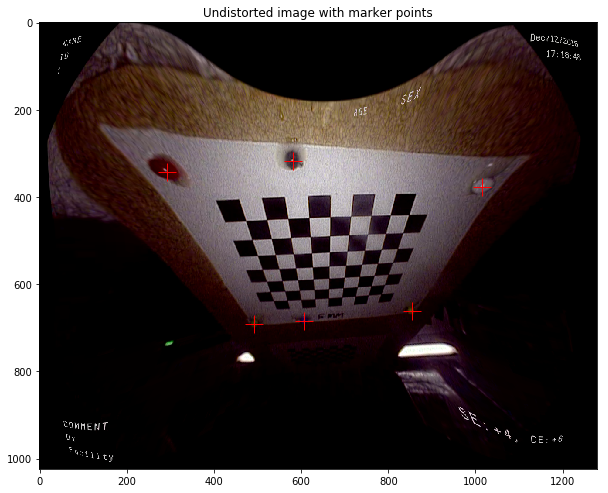

In [6]:
intrinsics_file = path.join(data_dir, 'refined_intrinsics.json')
cam_matrix, dist_coeffs = util.load_intrinsics(intrinsics_file)

h, w = raw_image.shape[:2]
new_cam_matrix, roi = cv.getOptimalNewCameraMatrix(cam_matrix, dist_coeffs,
                                                   (w, h), 1, (w, h))

image = cv.undistort(raw_image, cam_matrix, dist_coeffs, None, new_cam_matrix)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))
ax.set_title('Undistorted image with marker points')
ax.imshow(image)

img_points_cart = util.undistort_line(img_points_cart_raw, cam_matrix,
                                      dist_coeffs, new_cam_matrix)
for i in range(img_points_cart.shape[1]):
    point = img_points_cart[:, i]
    ax.plot(point[0], point[1], 'r+', markersize=18)